# Visualize and test 1D classifier

In this session we will:
* Learn to split data into train & test set
* Visualize data
* Build a simple classifier
* Test classifier: confiuson matrix

HomeWork:
* build a score function and analyze classifier

### Import libs

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
from sklearn.model_selection import StratifiedShuffleSplit    


plt.style.use('seaborn-poster')

### (1) Load & clean data

In [2]:
def load_and_scrub_dataset(dataset):
    df = pd.read_csv(dataset ) 
    df = df.drop(['Ticket','Cabin'], axis=1)
    # Remove NaN values
    df = df.dropna()
    sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
    sss.get_n_splits(df, df['Survived'])
    for train_index, test_index in sss.split(df, df['Survived']):
        df_train = df.iloc[train_index]
        df_test = df.iloc[test_index]
    return df_train, df_test

In [3]:
df_train, df_test = load_and_scrub_dataset("data/train.csv")
df = df_train

### (2) Visualize feature

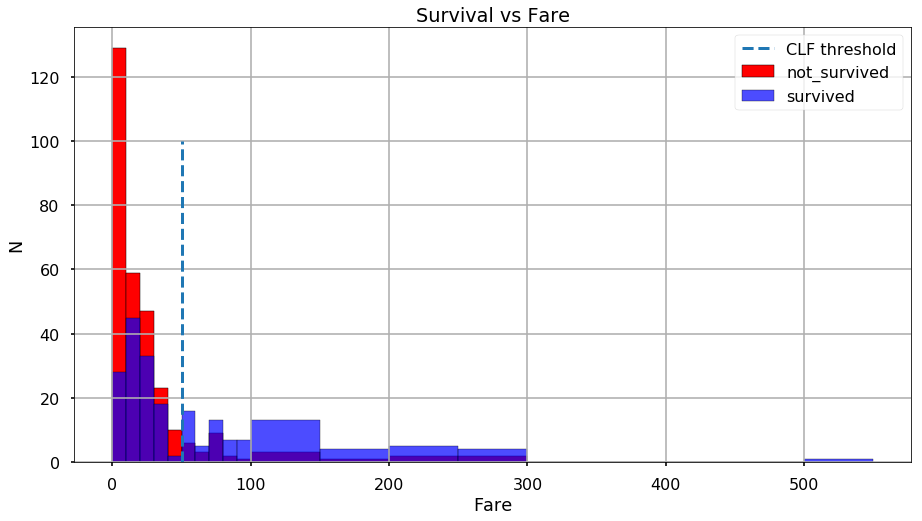

In [4]:
fig = plt.figure(figsize=(15,8))
bins = list(range(0,100,10))+list(range(100,600,50))
df[df.Survived == 0]['Fare'].hist(bins=bins, color='r', normed=False, edgecolor='black', label='not_survived')
df[df.Survived == 1]['Fare'].hist(bins=bins, color='b', normed=False, edgecolor='black', alpha=0.7, label='survived')

plt.plot([50, 50], [0, 100], '--', label='CLF threshold', linewidth=3)
# explain your plot
plt.title('Survival vs Fare')
plt.xlabel('Fare')
plt.ylabel('N')
plt.legend()
plt.show()

### (3) introduce classifier

In [5]:
def my_clf(features):
    # linear clf with simple threshold
    threshold = 40
    pred = np.zeros(len(features))
    pred[features > threshold] = 1
    return pred

In [6]:
pred = my_clf(df['Fare'])

### (4) Analyze classifier

 [confusion matrix](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

In [7]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[258  39]
 [124  77]]


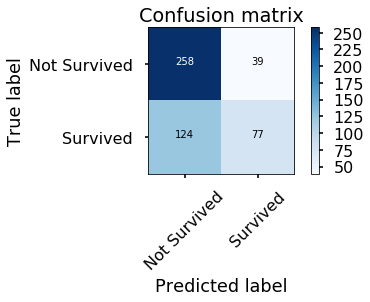

In [8]:
cnf_matrix = confusion_matrix(df['Survived'], pred)
class_names = ['Not Survived', 'Survived']
plot_confusion_matrix(cnf_matrix, class_names)

### (4.1) Analyze classifier on test set

Confusion matrix, without normalization
[[116  11]
 [ 64  23]]


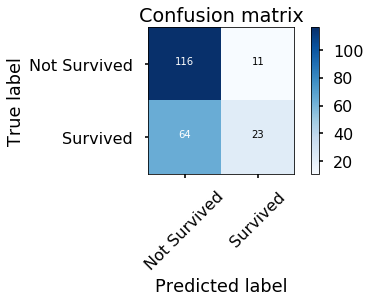

In [9]:
df = df_test
pred = my_clf(df['Fare'])
cnf_matrix = confusion_matrix(df['Survived'], pred)
class_names = ['Not Survived', 'Survived']
plot_confusion_matrix(cnf_matrix, class_names)